In [2]:
import numpy as np
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt
### permet de faire des zoom, des recadrages grâce à la souris : 
%matplotlib notebook
%matplotlib inline



import importlib
###  les fonctions de codage/décodage WAV : 
from scipy.io import wavfile as io
from IPython.display import Audio


from IPython.display import display, Math, Latex
from scipy.fftpack import fft, fftshift


In [31]:
Fe, data = io.read('Domine_quando_veneris_debut.wav')
print('fréquence échantillonnage (Hz)= '+str(Fe))



print(np.shape(data))
x = data[:,0]+data[:,1]  ### conversion en mono

x=x/32000   ### sinon valeurs du signal trop grandes

begin_echan_signal1 = int(np.round(1.5 * Fe) - 1)
end_echan_signal1 = int(np.round(2.5 * Fe) - 1)
begin_echan_signal2 = int(np.round(5.5 * Fe) - 1)
end_echan_signal2 = int(np.round(6.5 * Fe) - 1)

signal1 = x[begin_echan_signal1:end_echan_signal1]
signal2 = x[begin_echan_signal2:end_echan_signal2]

N1= np.arange(begin_echan_signal1,end_echan_signal1)
N2= np.arange(begin_echan_signal2,end_echan_signal2)

N1_len=len(N1)
N2_len=len(N2)

PuissanceN1 = np.sum(np.square(signal1))/N1_len
PuissanceN2 = np.sum(np.square(signal2))/N2_len

print(PuissanceN1)
print(PuissanceN2)

fréquence échantillonnage (Hz)= 44100
(1173276, 2)
0.017040372180413835
0.016107510000952206


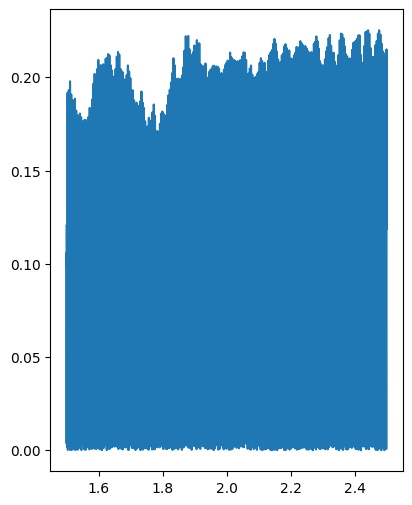

In [30]:
# graph 1 - signal 1
freqs=np.arange(1.5,2.5,1/44100)

plt.figure(1,figsize=(10,6))
plt.clf()

plt.subplot(122)
plt.plot(freqs,np.abs(signal1))

plt.savefig("UneSeuleSinusoide.pdf")
plt.show()
